In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.shape

(32560, 15)

# Checking null values

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

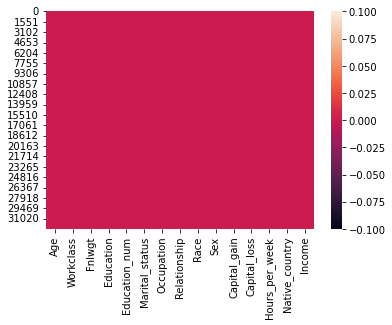

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

So there are no null values  are present

# Let's drop some columns

In [7]:
df=df.drop(["Capital_loss"],axis=1)

In [8]:
df=df.drop(["Capital_gain"],axis=1)

In [9]:
df=df.drop(["Race"],axis=1)

In [95]:
dfdf=df.drop(["Relationship"],axis=1)

In [13]:
df=df.drop(["Native_country"],axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [15]:
df["Workclass"]=Le.fit_transform(df["Workclass"])

In [16]:
Le.inverse_transform([0,1,2,3,4,5,6,7,8])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [17]:
df["Workclass"].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [18]:
df["Marital_status"]=Le.fit_transform(df["Marital_status"])

In [19]:
Le.inverse_transform([0,1,2,3,4,5,6])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [20]:
df["Marital_status"].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

In [65]:
Le.inverse_transform([0,1])

array([0, 1])

In [66]:
df["Income"]=Le.fit_transform(df["Income"])

In [67]:
Le.inverse_transform([0,1])

array([0, 1])

In [98]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Sex,Hours_per_week,Income
0,50,6,83311,13,2,0,1,13,0
1,38,4,215646,9,0,1,1,40,0
2,53,4,234721,7,2,0,1,40,0
3,28,4,338409,13,2,5,0,40,0
4,37,4,284582,14,2,5,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,5,0,38,0
32556,40,4,154374,9,2,0,1,40,1
32557,58,4,151910,9,6,4,0,40,0
32558,22,4,201490,9,4,3,1,20,0


# EDA

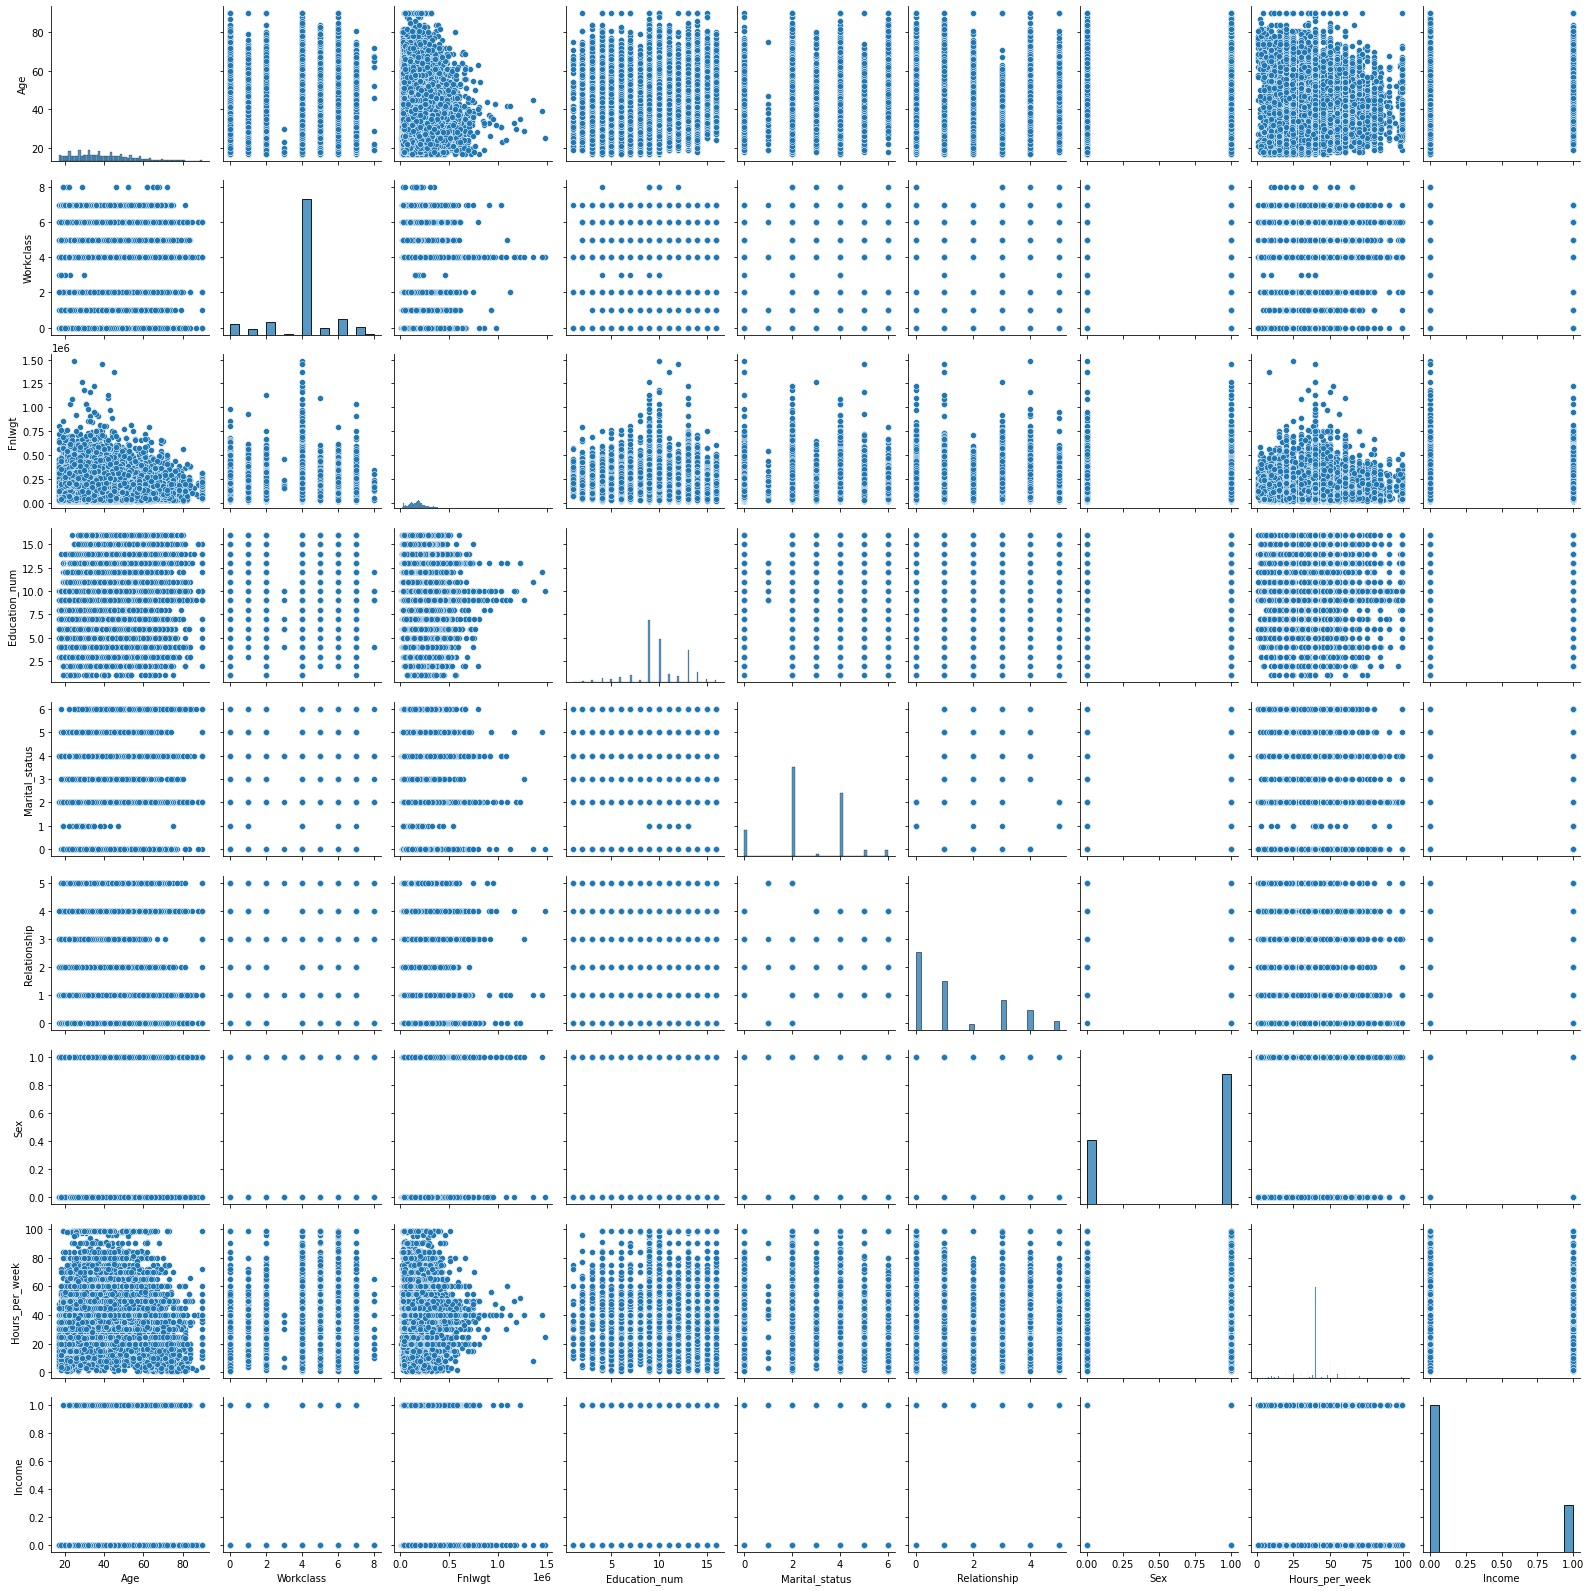

In [99]:
sns.pairplot(df)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

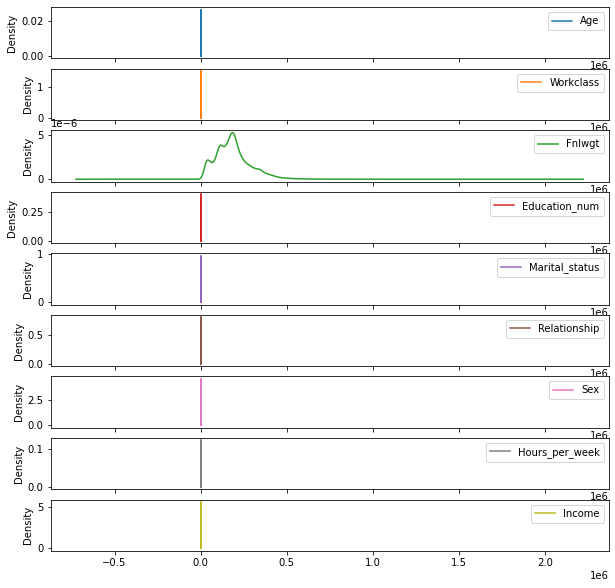

In [100]:
df.plot(kind='kde',subplots=True,figsize=(10,10))

We have seen the data are normally distributed

<AxesSubplot:ylabel='Frequency'>

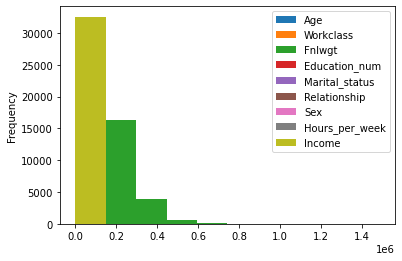

In [101]:
df.plot(kind="hist")

# Correlation

In [105]:
df.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Sex,Hours_per_week,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.263698,0.088832,0.068756,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,-0.090449,0.095942,0.138974,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.008922,0.026882,-0.018770,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,-0.094145,0.012256,0.148127,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,0.185461,-0.129337,-0.190521,-0.199295
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,1.000000,-0.582453,-0.248975,-0.250924
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,-0.582453,1.000000,0.229312,0.215995
Hours_per_week,0.068756,0.138974,-0.018770,0.148127,-0.190521,-0.248975,0.229312,1.000000,0.229690
Income,0.234039,0.051645,-0.009481,0.335182,-0.199295,-0.250924,0.215995,0.229690,1.000000


In [106]:
df.corr()["Income"].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.051645
Sex               0.215995
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

<AxesSubplot:>

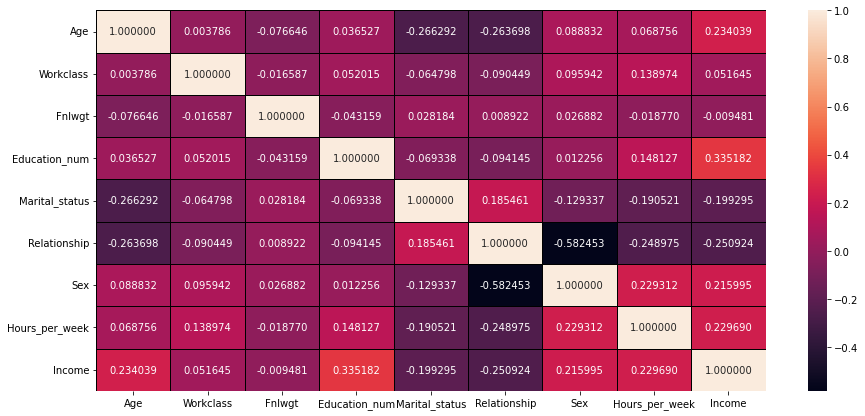

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

Relationship ,Marital_status ,Fnlwgt they are nagetively correlated

Workclass is very weakly correlated

Hours_per_week,Age ,Education_num they are very strongly correlated

# Describing dataset

In [108]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Sex,Hours_per_week,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.080590,2.611794,1.446376,0.669195,40.437469,0.240817
std,13.640642,1.455879,1.055498e+05,2.572709,1.506225,1.606794,0.470510,12.347618,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,2.000000,1.000000,1.000000,40.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,3.000000,1.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,5.000000,1.000000,99.000000,1.000000


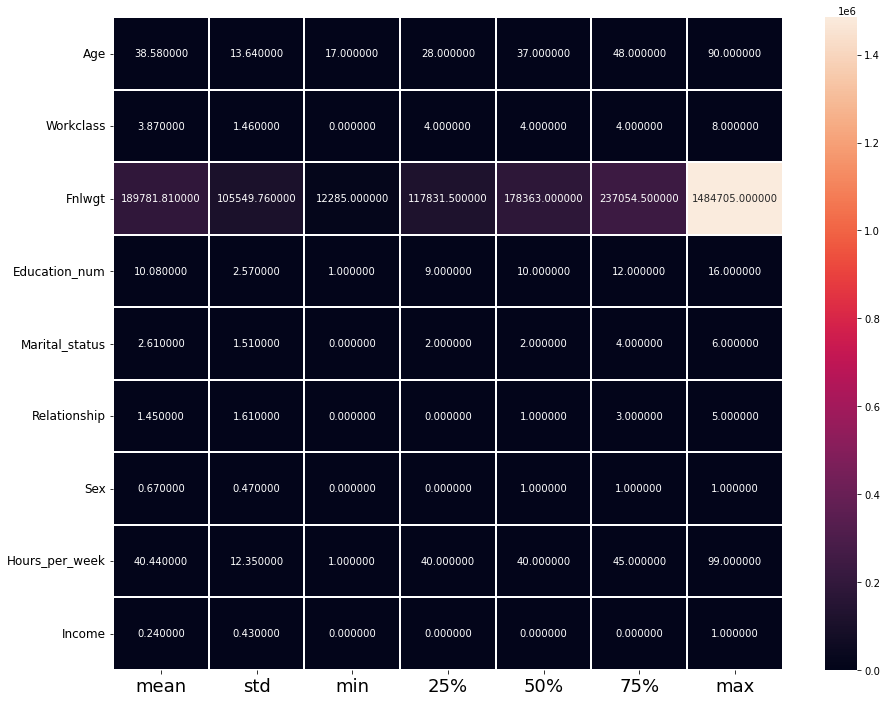

In [109]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

Age

mean:38

median:37

min:17

Max: 90

Workclass

mean:3

median:4

min:0

Max: 8

Fnlwgt

mean:1.8

median:1.7

min:1

Max:1.48

Education_num

mean:10

median:10

min:1

Max:16

Marital_status

mean:2.61

median:2

min:0

Max:6

Relationship

mean:1.4

median:1

min:0

Max:6

In [110]:
x=df.drop("Income",axis=1)
y=df["Income"]#target column

In [111]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Sex,Hours_per_week
0,50,6,83311,13,2,0,1,13
1,38,4,215646,9,0,1,1,40
2,53,4,234721,7,2,0,1,40
3,28,4,338409,13,2,5,0,40
4,37,4,284582,14,2,5,0,40
...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,5,0,38
32556,40,4,154374,9,2,0,1,40
32557,58,4,151910,9,6,4,0,40
32558,22,4,201490,9,4,3,1,20


In [112]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

In [113]:
x.shape

(32560, 8)

In [114]:
x.skew().sort_values(ascending=False)

Fnlwgt            1.446972
Relationship      0.786784
Age               0.558738
Hours_per_week    0.227636
Marital_status   -0.013448
Education_num    -0.311630
Sex              -0.719244
Workclass        -0.752280
dtype: float64

In [115]:
from sklearn.preprocessing import power_transform

In [116]:
x_new=power_transform(x)

In [117]:
type(x_new)

numpy.ndarray

In [77]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Relationship', 'Sex', 'Hours_per_week'],
      dtype='object')

# VIF

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [87]:
calc_vif()

        variables  VIF FACTOR
0             Age    7.540798
1       Workclass    7.576943
2          Fnlwgt    3.956315
3   Education_num   13.063664
4  Marital_status    3.761623
5    Relationship    2.432856
6             Sex    4.252720
7  Hours_per_week   11.441351


All values are kind off same so no multicollinearity is present

# Skewness

In [118]:
sk=x.skew()
sk

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education_num    -0.311630
Marital_status   -0.013448
Relationship      0.786784
Sex              -0.719244
Hours_per_week    0.227636
dtype: float64

In [119]:
sk[np.abs(sk)>0.5].all()

True

In [120]:
sk[np.abs(sk)<0.5].all()

True

In [121]:
x.skew()[np.abs(x.skew())<0.25].all()

True

In [122]:
x=power_transform(x,method='yeo-johnson')

In [123]:
x.skew()[np.abs(x.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

# skewness has been removed

# checking outlayers

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Relationship    32560 non-null  int64
 6   Sex             32560 non-null  int64
 7   Hours_per_week  32560 non-null  int64
 8   Income          32560 non-null  int64
dtypes: int32(2), int64(7)
memory usage: 2.0 MB


In [125]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

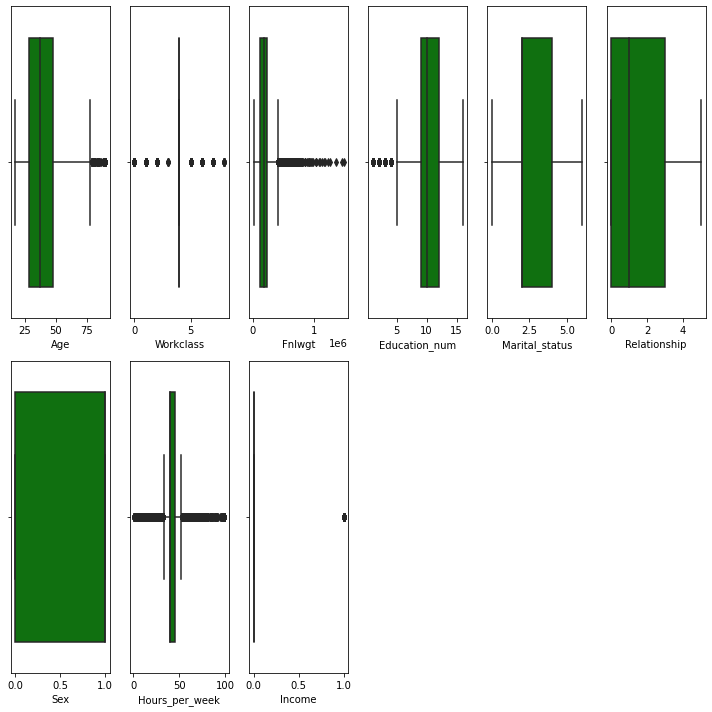

In [126]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(2,6,graph)
    sns.boxplot(df[colist[i]],color='green',orient='h')
    graph+=1
    plt.tight_layout()

In [127]:
from scipy.stats import zscore

In [128]:
(np.abs(zscore(x))<3).all()

False

In [129]:
z=np.abs(zscore(x))
z.shape

(32560, 8)

In [130]:
x.shape

(32560, 8)

In [131]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([    9,    27,    76,   156,   188,   271,   298,   311,   413,
         519,   588,   826,   934,  1011,  1033,  1035,  1063,  1065,
        1171,  1199,  1261,  1271,  1290,  1410,  1416,  1457,  1499,
        1596,  1683,  1729,  1823,  1886,  1900,  1928,  1970,  1986,
        2014,  2332,  2346,  2357,  2368,  2428,  2443,  2593,  2759,
        2760,  2919,  2931,  2958,  2962,  2976,  3091,  3192,  3224,
        3290,  3301,  3302,  3342,  3577,  3746,  3748,  3772,  3908,
        3963,  4085,  4090,  4100,  4235,  4277,  4293,  4307,  4311,
        4336,  4347,  4440,  4567,  4572,  4735,  4777,  4861,  5084,
        5171,  5241,  5368,  5375,  5422,  5431,  5467,  5488,  5506,
        5552,  5589,  5593,  5621,  5631,  5681,  5765,  5807,  5876,
        5915,  6069,  6083,  6166,  6179,  6257,  6379,  6389,  6474,
        6523,  6617,  6692,  6742,  6743,  6821,  6845,  6897,  7026,
        7099,  7141,  7156,  7526,  7579,  7605,  7662,  7677,  7808,
        7809,  7862

In [132]:
x_new_z=df[(z<3).all(axis=1)]
x_new_z

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Sex,Hours_per_week,Income
0,50,6,83311,13,2,0,1,13,0
1,38,4,215646,9,0,1,1,40,0
2,53,4,234721,7,2,0,1,40,0
3,28,4,338409,13,2,5,0,40,0
4,37,4,284582,14,2,5,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,5,0,38,0
32556,40,4,154374,9,2,0,1,40,1
32557,58,4,151910,9,6,4,0,40,0
32558,22,4,201490,9,4,3,1,20,0


In [133]:
x_new_z.shape

(32001, 9)

Outlayer has been removed

# Data Loss

In [134]:
(32560-32001)/32560*100

1.7168304668304668

1.17% data have been removed

# Let's training the Dataset

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [136]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 29 The model is performing very wel
Traning accuracy score is= 29
Testing accuracy score is= 29
randam state= 60 The model is performing very wel
Traning accuracy score is= 60
Testing accuracy score is= 60
randam state= 93 The model is performing very wel
Traning accuracy score is= 93
Testing accuracy score is= 93
randam state= 125 The model is performing very wel
Traning accuracy score is= 125
Testing accuracy score is= 125
randam state= 128 The model is performing very wel
Traning accuracy score is= 128
Testing accuracy score is= 128
randam state= 134 The model is performing very wel
Traning accuracy score is= 134
Testing accuracy score is= 134
randam state= 137 The model is performing very wel
Traning accuracy score is= 137
Testing accuracy score is= 137
randam state= 139 The model is performing very wel
Traning accuracy score is= 139
Testing accuracy score is= 139
randam state= 152 The model is performing very wel
Traning accuracy score is= 152
Testing accuracy score 

randam state= 928 The model is performing very wel
Traning accuracy score is= 928
Testing accuracy score is= 928
randam state= 934 The model is performing very wel
Traning accuracy score is= 934
Testing accuracy score is= 934
randam state= 957 The model is performing very wel
Traning accuracy score is= 957
Testing accuracy score is= 957
randam state= 979 The model is performing very wel
Traning accuracy score is= 979
Testing accuracy score is= 979
randam state= 987 The model is performing very wel
Traning accuracy score is= 987
Testing accuracy score is= 987
randam state= 991 The model is performing very wel
Traning accuracy score is= 991
Testing accuracy score is= 991


In [137]:
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4922
           1       0.68      0.43      0.53      1590

    accuracy                           0.81      6512
   macro avg       0.76      0.68      0.71      6512
weighted avg       0.80      0.81      0.80      6512

0.8118857493857494
[[4603  319]
 [ 906  684]]


HERE ACCURACY_SCORE IS 75 TRUE POSITIVE RATE IS 4922 AND TRUE NAGETIVE RATE IS 0

# DTC

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 77.3034398034398
[[4187  735]
 [ 743  847]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4922
           1       0.54      0.53      0.53      1590

    accuracy                           0.77      6512
   macro avg       0.69      0.69      0.69      6512
weighted avg       0.77      0.77      0.77      6512



here accuracy score is 77 and true positive rate is 4186 and true nagetive rate is 843

# RandomForestClassifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 81.51105651105651
[[4432  490]
 [ 714  876]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4922
           1       0.64      0.55      0.59      1590

    accuracy                           0.82      6512
   macro avg       0.75      0.73      0.74      6512
weighted avg       0.81      0.82      0.81      6512



here accuracy score is 81 ....true positive rate is 4413 and true nagetive rate is 885

# SVC

In [143]:
from sklearn.svm import SVC

In [144]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 82.0945945945946
[[4625  297]
 [ 869  721]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4922
           1       0.71      0.45      0.55      1590

    accuracy                           0.82      6512
   macro avg       0.78      0.70      0.72      6512
weighted avg       0.81      0.82      0.81      6512



here accuracy score is 75 and true positive rate is 4922

# Let's check cv ...and see model is overfitted or not

In [145]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [146]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())

CV score for Random Forest Model: 0.8140970515970517


# SVC

In [147]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 0.8267506142506142


# Logistic

In [148]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 0.8129606879606879


Cv for RandomForestClassifier

In [149]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.8129606879606879 
The accuracy score is:- [0.81265356 0.80789312 0.81464988 0.82371007 0.81157862]


CV for SVC

In [150]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.8267506142506142 
The accuracy score is:- [0.81265356 0.80789312 0.81464988 0.82371007 0.81157862]


CV for LR

In [151]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 0.8129606879606879 
The accuracy score is:- [0.80697174 0.81449631 0.81403563 0.81526413 0.81403563]


# Hyperparameter Tunning

In [152]:
RandomForestClassifier()

RandomForestClassifier()

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [155]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [156]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [157]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [158]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.827088452088452

# Model is performing 82% well

# AUC ROC CURVE

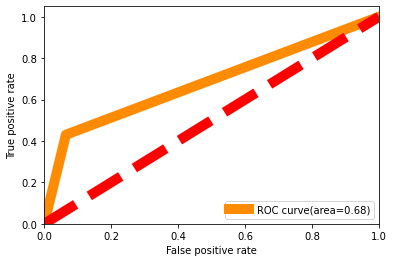

In [159]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='red',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [160]:
import pickle
filename='Census_Income.pkl'
pickle.dump(rf,open(filename,'wb'))

In [161]:
loaded_model=pickle.load(open('Census_Income.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [162]:
results

0.8151105651105651

# conclusion

In [163]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Orginal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,6502,6503,6504,6505,6506,6507,6508,6509,6510,6511
Predicted,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Orginal,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
